In [1]:
import cv2
import  numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageTk, ImageOps

In [2]:
path = "test2.jpg"
image = cv2.imread(path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

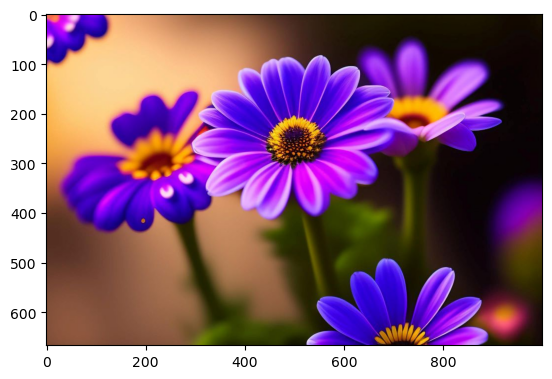

In [3]:
plt.imshow(image)

In [7]:
# temphist = cv2.calcHist(image, [0,1,2], None, [64], [0,256])
# temphist

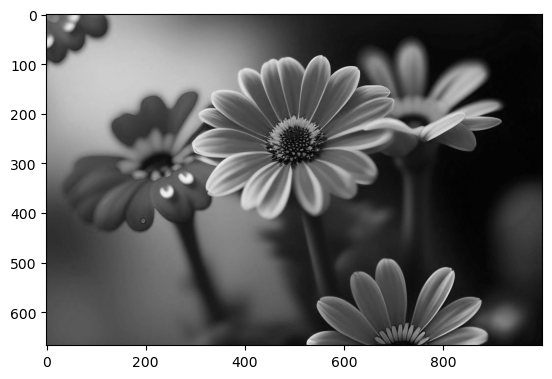

In [4]:
plt.imshow(gray_img,cmap ='gray')

In [5]:
def my_histEqu(img,bins=256):
    hist,_ = np.histogram(img.flatten(),bins=bins,range=(0,256))
    cdf = np.cumsum(hist) #Cumulative sum of hist values
    cdf_normal = cdf/cdf.max()
    equalized_img = np.interp(gray_img.flatten(),np.arange(0,bins),cdf_normal*255)
    equal_img = equalized_img.reshape(gray_img.shape)
    return equal_img

In [6]:
def my_imageCompression(image,cFactor): # cFactor = compression factor-ratio for downsampling of image
    img_compressed = my_histEqu(gray_img)
    img_compressed = img_compressed[::cFactor,::cFactor]
    return img_compressed

In [10]:
def histograms(gray_image,compressed_image):
    plt.figure(figsize=(11, 6))
    plt.subplot(2, 3, 1)
    plt.hist(gray_image.flatten(), bins=256, color='purple', alpha=1)
    plt.title('Original Image Histogram')
    plt.subplot(2, 3, 2)
    plt.hist(compressed_image.flatten(), bins=256, color='orange', alpha=1)
    plt.title('Compressed Image Histogram')
    plt.show()

In [11]:
# (a) 
compressed_img = my_imageCompression(gray_img,3)

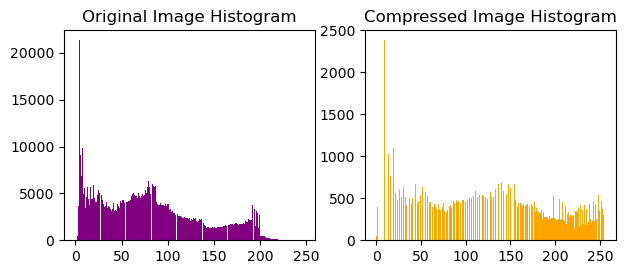

In [12]:
# (b)
histograms(gray_img,compressed_img)

In [13]:
#Saving gray image first
plt.imsave('Gray_image.png', gray_img, cmap='gray')

In [14]:
#Saving compressed image
plt.imsave('compressed_image.png', compressed_img, cmap='gray')

In [15]:
#(c) comparing results with opencv histogram func

In [16]:
def img_compressionCV(image,cFactor): # cFactor = compression factor-ratio for downsampling of image
    Cv_compressed = cv2.equalizeHist(gray_img)
    Cv_compressed = Cv_compressed[::cFactor,::cFactor]
    return Cv_compressed

In [17]:
new_cv_compressed = img_compressionCV(gray_img,3)

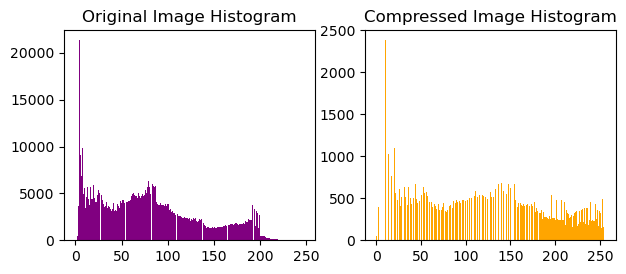

In [18]:
histograms(gray_img,new_cv_compressed)

In [20]:
# Save the compressed image using OpenCV with PNG compression
cv2.imwrite('compressed_image_CV.png', new_cv_compressed, [cv2.IMWRITE_PNG_COMPRESSION, 3])

True